In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


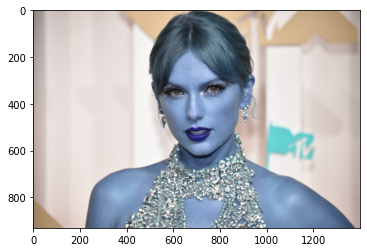

In [ ]:
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

# Code to read and display image
taylorswift = cv2.imread("/content/drive/MyDrive/DS with Python/Eras Tour_ Ticketmaster fiasco.jpg")
plt.imshow(taylorswift)


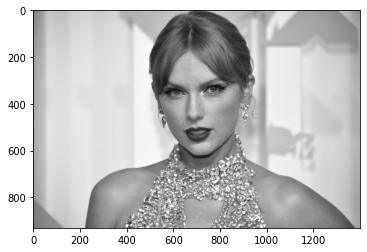

In [ ]:
# The image is converted to gray scale for the detection and displayed

gray = cv2.cvtColor(taylorswift, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [ ]:
# Haarcascade declaration for face and eyes,

FaceHaarcascade=cv2.CascadeClassifier('/content/drive/MyDrive/DS with Python/haarcascade_frontalface_default.xml')
EyeHaarcascade=cv2.CascadeClassifier('/content/drive/MyDrive/DS with Python/haarcascade_eye.xml')

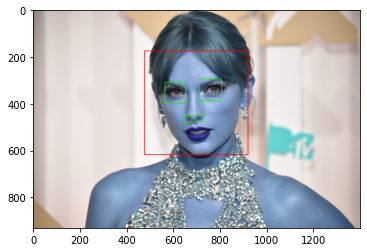

In [ ]:
# The haarcascade eye and face detection is performed to clean the data and remove the images that are not useful for prediction.

faces=FaceHaarcascade.detectMultiScale(gray,1.3,5)

for (x,y,width,height) in faces:
    a=x+width
    b=y+height
    Face=cv2.rectangle(taylorswift,(x,y),(a,b),(255,0,0),2)
    FaceGray=gray[y:b, x:a]
    FaceColor=Face[y:b,x:a]
    eyes=EyeHaarcascade.detectMultiScale(FaceGray)
    for (eyes_x,eyes_y,eyes_width,eyes_height) in eyes:
        cv2.rectangle(FaceColor,(eyes_x,eyes_y),(eyes_x+eyes_width,eyes_y+eyes_height),(0,255,0),2)
        

plt.figure()
plt.imshow(Face,cmap='gray')
plt.show()

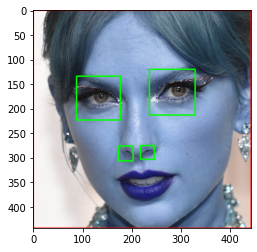

In [ ]:
# Code to plot the cropped image

%matplotlib inline
plt.imshow(FaceColor,cmap='gray')

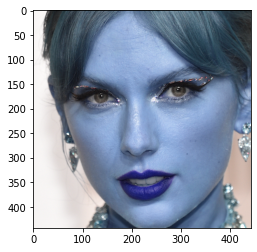

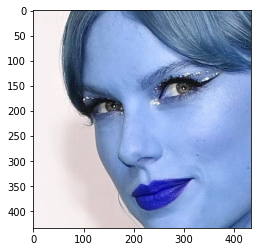

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = FaceHaarcascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = EyeHaarcascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            #plt.imshow(roi_color)
            return roi_color
cropped=[]
Not_detected=[]
Image_1=get_cropped_image_if_2_eyes("/content/drive/MyDrive/DS with Python/Eras Tour_ Ticketmaster fiasco.jpg")
if(Image_1 is not None):
  cropped.append(Image_1)
else:
  Not_detected.append(cv2.imread("/content/drive/MyDrive/DS with Python/Eras Tour_ Ticketmaster fiasco.jpg"))
Image_2=get_cropped_image_if_2_eyes("/content/drive/MyDrive/DS with Python/Saina Nehwal.jpg")

if(Image_2 is not None):
  cropped.append(Image_2)
else:
  Not_detected.append(cv2.imread("/content/drive/MyDrive/DS with Python/Saina Nehwal.jpg"))
Image_3=get_cropped_image_if_2_eyes("/content/drive/MyDrive/DS with Python/Taylor-Swift/2023 Super Bowl Halftime Show.jpg")

if(Image_3 is not None):
  cropped.append(Image_3)
else:
  Not_detected.append(cv2.imread("/content/drive/MyDrive/DS with Python/Taylor-Swift/2023 Super Bowl Halftime Show.jpg"))
for i in range(len(cropped)):
  if(cropped[i] is not None):
    plt.figure()
    plt.imshow(cropped[i])


The below image's eyes are not detected properly, Therefore these kind of images will not be included in the training datasets.


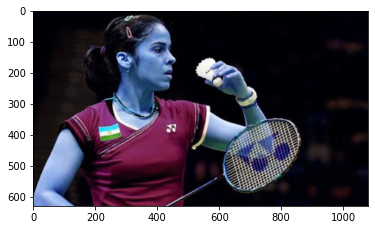

In [ ]:
print("The below image's eyes are not detected properly, Therefore these kind of images will not be included in the training datasets.")
for i in range(len(Not_detected)):
  if(Not_detected[i] is not None):
    plt.figure()
    plt.imshow(Not_detected[i])

In [ ]:
import os

Images_folder_list=[]
Images_folder_list.append("/content/drive/MyDrive/DS with Python/Taylor-Swift")
Images_folder_list.append("/content/drive/MyDrive/DS with Python/Ed-Sheeren")

cropped_image_dirs = []
celebrity_file_names_dict = {}

path = "/content/drive/MyDrive/DS with Python/cropped/"

import shutil
if os.path.exists(path):
     shutil.rmtree(path)
os.mkdir(path)

for img_dir in Images_folder_list:
    count = 1
    celebrity_name = img_dir.split('/')[-1]   
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)                
            cropped_file_name = celebrity_name+str(count) +".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1

class_dict
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    imArray =  np.float32(imArray)   
    imArray /= 255;
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  



              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.75      0.86         4

    accuracy                           0.96        25
   macro avg       0.98      0.88      0.92        25
weighted avg       0.96      0.96      0.96        25

                 Model  Best Accuracy  Error Rates
0                  SVM       0.933333     0.066667
1        Random Forest       0.906667     0.093333
2                  KNN       0.852381     0.147619
3  Logistic Regression       0.890476     0.109524
4        Decision Tree       0.906667     0.093333


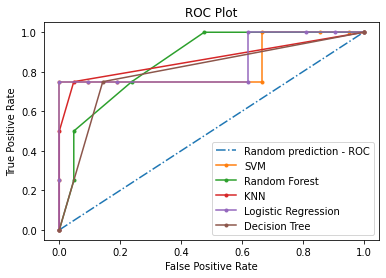

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB

import numpy as np
X1=np.array(X)
y1=np.array(y)

X1=X1.reshape(99,4096)
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

print(classification_report(y_test, pipe.predict(X_test)))
model_params = {
    'SVM': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,2,3,4,5,6,7,8,9,10]
        }
    },
    'KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'kneighborsclassifier__n_neighbors': [2,3,4,5,6,7,8,9]
        }
    },
    'Logistic Regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }, 
    'Decision Tree' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'decisiontreeclassifier__criterion': ['entropy','gini']
        }
    }
    }

Accuracy = []
best_estimators = {}
mod={}
acc=[]
error=[]
fpr=[]
tpr=[]
auc=[]
from sklearn.metrics import roc_curve, roc_auc_score
prob=[0 for _ in range(len(y_test))]
rauc = roc_auc_score(y_test,prob)
rfpr, rtpr,_ = roc_curve(y_test,prob)
plt.plot(rfpr, rtpr, linestyle='-.', label='Random prediction - ROC' % rauc)

import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    model =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    model.fit(X_train, y_train)
    prob = model.predict_proba(X_test)
    rf_probs = prob[:, 1]
    rf_auc = roc_auc_score(y_test, rf_probs)
    r_fpr, r_tpr,_ = roc_curve(y_test, rf_probs)
    plt.plot(r_fpr, r_tpr, marker='.', label=algo % rf_auc)
    Accuracy.append({
        'Model': algo,
        'Best Accuracy': model.best_score_,
        'Error Rates' : 1-model.best_score_
    })
    scr=model.best_score_
    mod[algo] = scr
    error.append(1-model.best_score_)
    best_estimators[algo] = model.best_estimator_

df = pd.DataFrame(Accuracy,columns=['Model','Best Accuracy','Error Rates'])
print(df[['Model','Best Accuracy','Error Rates']])
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
     


Text(0.5, 0.98, 'Accuracies of the models')

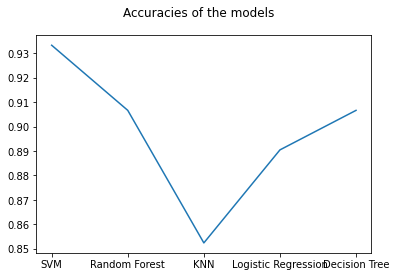

In [ ]:
Algorithms=list(mod.keys())
Bestscore=list(mod.values())
fig,ax=plt.subplots()
ax.plot(Algorithms,Bestscore)
fig.suptitle('Accuracies of the models')

Text(0.5, 0.98, 'Accuracies of the models')

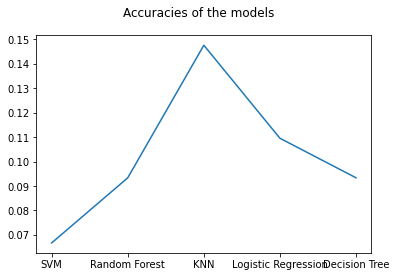

In [ ]:
fig,ax=plt.subplots()
ax.plot(Algorithms,error)
fig.suptitle('Loss of the models')